## Principle of superposition 

As we saw in GEOSCI 627, the superposition of analytical solutions is a powerful tool for describing systems with more complex initial conditions. The principle of superposition

To apply superposition we need a few conditions to be true. First, we need a “linear” differential equation. That is, one for which:
a) the dependent variable and all its derivatives are of the first degree (i.e. the power on any dependent variable terms is one)
b) the coefficients are constants or functions of only the independent variable(s)
The second condition is that we the differential equation needs to be homogeneous. A linear differential equation is mathematically homogeneous if the term(s) without the dependent variable equal zero.

When the advection-diffusion equation (ADE) is linear and homogeneous, sums of the solutions are also linear. This important condition allows us to use the principle of superposition to analytically solve the ADE and the diffusion equation for relative complex (i.e. mixed or inhomogeneous) boundary and initial conditions. As described by Bear (1972) "The principle of superposition means that the presence of one boundary condition does not affect the response produced by the presence of other boundary or initial conditions. Therefore, to analyze the combined effect of a number of boundary conditions (excitations) we may start by solving for the effect of each individual excitation and then combine the results." For example, the principle of superposition is often used to analytically describe the transport behavior of finite volume solute plumes.

Let's take a look at a simple example using the diffusion equation that we saw the other day

In [1]:
# Import the neccesary libraries
# Import only the math.erfc (complementary error function) and math.erf (error function) from the math Library
from scipy.special import erfc as erfc
from scipy.special import erf as erf
import numpy as np
import matplotlib.pyplot as plt

Define our diffusion function as we did in the Diffusion Analytical Demo notebook. Note that in this superposition example we are using the form with the complementary error function, however either can be used.

In [27]:
def diffusion_fun(x, t, Df, C0):
    # Equation for concentration profile as a function of space (x) and time (t)
    C = C0/2*(erfc((x)/(2*np.sqrt(Df*t))))
    # Return the concentration (C) from this function
    return C

When superposing two solutions, we are essentially adding multiple solutions that are offset in space or time. For example if we want to model a discrete plume that has a width of 1 meter, and we want to center the plume at x=0, then we add two solutions that are offset on either side of x=0 by 0.5 meters. To set up this problem, run the following:

In [28]:
# Define plume width
plume_width = 1 # meter

# Define spatial coordinates
x = np.linspace(-10, 10, num=500)

# Define diffusion coefficient
Df = 5E-9

# Define initial plume concentration
C0 = 1

# Define the initial time we want to look at 
t = 1 # second

Now we will use our handy function to calculate the concentration profiles of the offset solutions.

Text(0, 0.5, 'Concentration [-]')

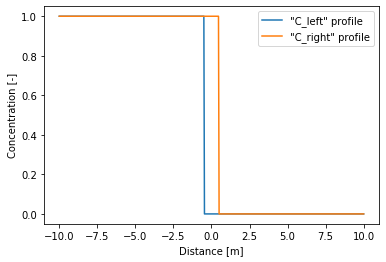

In [36]:
# Concentration profile offset to the right
C_right = diffusion_fun(x-(plume_width/2), t, Df, C0)
# Concentration profile offset to the left
C_left = diffusion_fun(x+(plume_width/2), t, Df, C0)
# Plot the profiles
c1, = plt.plot(x, C_left, label='"C_left" profile')
c2, = plt.plot(x, C_right, label='"C_right" profile')
# Format the plots
plt.legend(handles=[c1, c2])
plt.xlabel('Distance [m]')
plt.ylabel('Concentration [-]')


Text(0, 0.5, 'Concentration [-]')

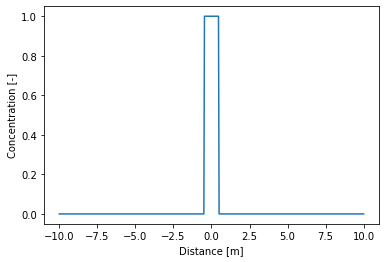

In [37]:
plt.plot(x, C_right-C_left)
plt.xlabel('Distance [m]')
plt.ylabel('Concentration [-]')

## Activity:
#### Using this code, evaluate the evolution of this plume over time.
How do you expect this to change the shape of this curve?

Plot the case of Df = 1E-9 and Df = 1E-10 after 1 day, 1 month, and 6 months. In the plot you generate make sure to add axis labels and a legend.

Next, change the plume width to 2.5 meters wide. How would you generate a plot when the plume is not centered at x=0?